Adaptive Linear Neuron - Adaline


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

In [2]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    lab = lab.reshape(xx1.shape)

    plt.contour(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolor="black",
        )

    # plt.xlabel("Длина чашелистника, см")
    # plt.ylabel("Длина лепестка, см")
    # plt.legend(loc="upper left")


In [3]:
dataset_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
)

df = pd.read_csv(dataset_url, header=None, encoding="utf-8")

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Gradient Descent (Full Batch)


In [4]:
class AdalineGD:
    """Классификатор на основе адаптивных линейных нейронах.

    Parameters:
        eta: float
            Скорость обучения (0.0; 1.0)
        n_iter: int
            Кол-во эпох для обучения.
        random_state: int
            Зерно для генератора случайных чисел.

    Attributes:
        w_: 1d-array
            Веса после обучения.
        b_: Scalar
            Смещение после обучения.
        losses_: list[int]
            Значение среднеквадратичной функции потерь в каждой эпохе.
    """

    def __init__(self, eta: float, n_iter: int, random_state: int):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def net_input(self, X):
        """Вычисление фактического ввода.

        Args:
            X: {array-like}, shape = [n_examples, n_features]
                Обучающий набор признаков.

        Returns:
            {array-like}, shape = [n_examples]:
                Массив фактического ввода каждого признака.
        """
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Вычисление линейной активации

        Args:
            X: {array-like}, shape = [n_examples]
                Массив фактического ввода каждого признака.

        Returns:
            {array-like}, shape = [n_examples]:
                Массив линейной активации каждого признака.
        """
        return X

    def fit(self, X, y):
        """Подгонка модели к обучающим данным.

        Args:
            X: {array-like}, shape = [n_examples, n_features]
                Обучающий набор признаков.
            y: {array-like}, shape = [n_examples]
                Обучающий набор меток классов.

        Returns:
            object: Self
        """
        rgen = np.random.RandomState(self.random_state)

        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.0)

        self.losses_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)

            errors = y - output

            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()

            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self

    def predict(self, X):
        """Получение предполагаемой метки класса.

        Args:
            X: {array-like}, shape = [n_examples, n_features]
                Массив входных признаков образцов.

        Returns:
            {array-like}, shape = [n_examples]:
                Массив предполагаемых меток образцов.
        """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


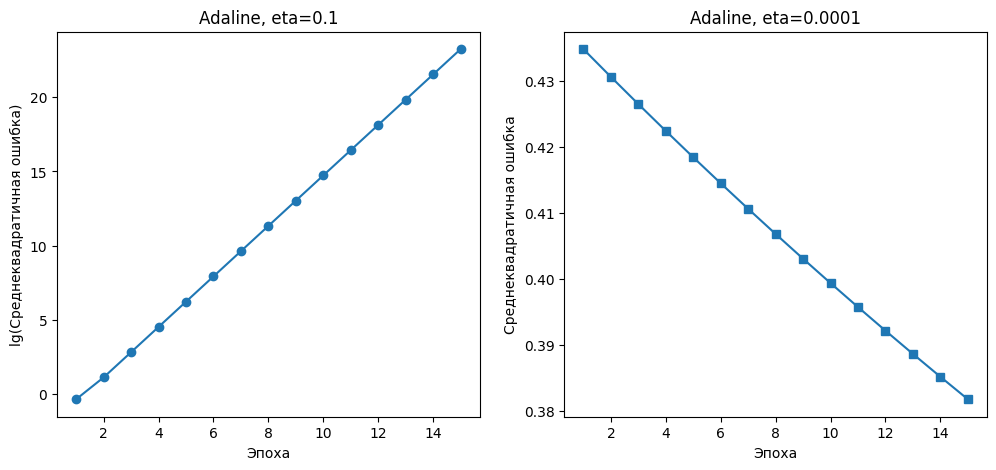

In [5]:
X = df.iloc[:100, [0, 2]].to_numpy()
y = np.where(
    df.iloc[:100, 4].to_numpy() == "Iris-setosa",
    0,
    1,
)

ada1 = AdalineGD(eta=0.1, n_iter=15, random_state=1)
ada1.fit(X, y)

ada2 = AdalineGD(eta=0.0001, n_iter=15, random_state=1)
ada2.fit(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(range(1, ada1.n_iter + 1), np.log10(ada1.losses_), marker="o")
ax[0].set_xlabel("Эпоха")
ax[0].set_ylabel("lg(Среднеквадратичная ошибка)")
ax[0].set_title("Adaline, eta=0.1")

ax[1].plot(range(1, ada2.n_iter + 1), ada2.losses_, marker="s")
ax[1].set_xlabel("Эпоха")
ax[1].set_ylabel("Среднеквадратичная ошибка")
ax[1].set_title("Adaline, eta=0.0001")

plt.show()

Add standartization


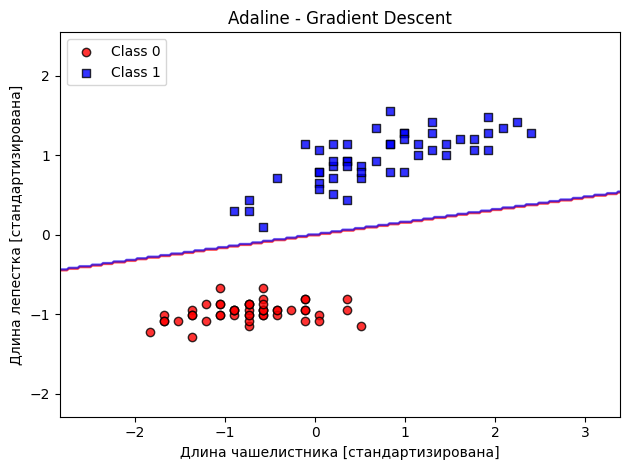

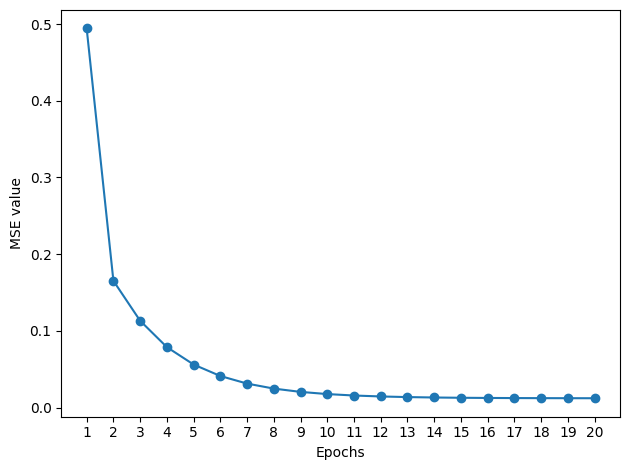

MSE min value: 0.01226343492165436


In [6]:
X_std = np.copy(X)

X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

ada_gd = AdalineGD(eta=0.5, n_iter=20, random_state=1).fit(X_std, y)
plot_decision_regions(X_std, y, ada_gd)
plt.title("Adaline - Gradient Descent")
plt.xlabel("Длина чашелистника [стандартизирована]")
plt.ylabel("Длина лепестка [стандартизирована]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, ada_gd.n_iter + 1), ada_gd.losses_, marker="o")
plt.xlabel("Epochs")
plt.xticks(range(1, ada_gd.n_iter + 1))
plt.ylabel("MSE value")
plt.tight_layout()

plt.show()

print(f"MSE min value: {min(ada_gd.losses_)}")


Stochastic Gradient Descent Adaline Alhorithm with Online Learning


In [7]:
class AdalineSGD:
    """Классификатор на основе адаптивных линейных нейронах.

    Parameters:
        eta: float
            Скорость обучения (0.0; 1.0)
        n_iter: int
            Кол-во эпох для обучения.
        shuffle: bool (default: True)
            Нужно ли перемешивать данные каждую эпоху.
        random_state: int
            Зерно для генератора случайных чисел.

    Attributes:
        w_: 1d-array
            Веса после обучения.
        b_: Scalar
            Смещение после обучения.
        losses_: list[int]
            Значение среднеквадратичной функции потерь в каждой эпохе.
    """

    def __init__(
        self,
        eta: float,
        n_iter: int,
        random_state: int,
        shuffle: bool = True,
    ):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialiazed = False
        self.shuffle = shuffle
        self.random_state = random_state

    def _initialize_weights(self, n_features: int):
        self.rgen = np.random.RandomState(self.random_state)

        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=n_features)
        self.b_ = np.float64(0.0)

        self.w_initialiazed = True

    def _shuffle(self, X, y):
        """Перемешивание обучающих данных."""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _update_weights(self, x_i, y):
        output = self.activation(self.net_input(x_i))
        error = y - output

        self.w_ += self.eta * 2.0 * error * x_i
        self.b_ += self.eta * 2.0 * error

        loss = error**2
        return loss

    def net_input(self, X):
        """Вычисление фактического ввода.

        Args:
            X: {array-like}, shape = [n_examples, n_features]
                Обучающий набор признаков.

        Returns:
            {array-like}, shape = [n_examples]:
                Массив фактического ввода каждого признака.
        """
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Вычисление линейной активации

        Args:
            X: {array-like}, shape = [n_examples]
                Массив фактического ввода каждого признака.

        Returns:
            {array-like}, shape = [n_examples]:
                Массив линейной активации каждого признака.
        """
        return X

    def fit(self, X, y):
        """Подгонка модели к обучающим данным.

        Args:
            X: {array-like}, shape = [n_examples, n_features]
                Обучающий набор признаков.
            y: {array-like}, shape = [n_examples]
                Обучающий набор меток классов.

        Returns:
            object: Self
        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)

            losses = []

            for x_i, target in zip(X, y):
                losses.append(self._update_weights(x_i, target))

            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)

        return self

    def partial_fit(self, X, y):
        """Подгонка к обучающим данным без повторной инициализации весов."""

        if not self.w_initialiazed:
            self._initialize_weights(X.shape[1])

        if y.ravel().shape[0] > 1:
            for x_i, target in zip(X, y):
                self._update_weights(x_i, target)
        else:
            self._update_weights(X, y)

        return self

    def predict(self, X):
        """Получение предполагаемой метки класса.

        Args:
            X: {array-like}, shape = [n_examples, n_features]
                Массив входных признаков образцов.

        Returns:
            {array-like}, shape = [n_examples]:
                Массив предполагаемых меток образцов.
        """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

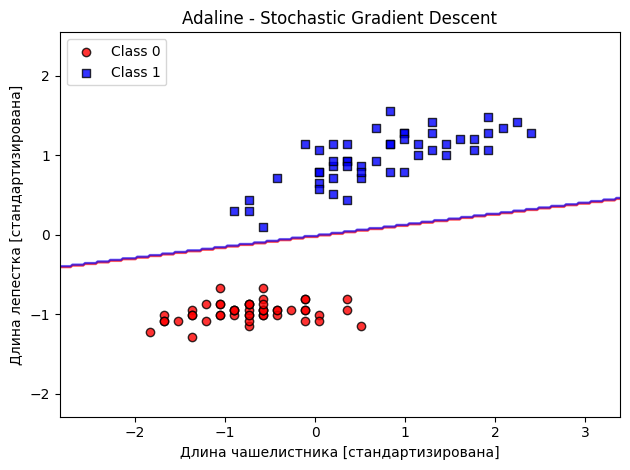

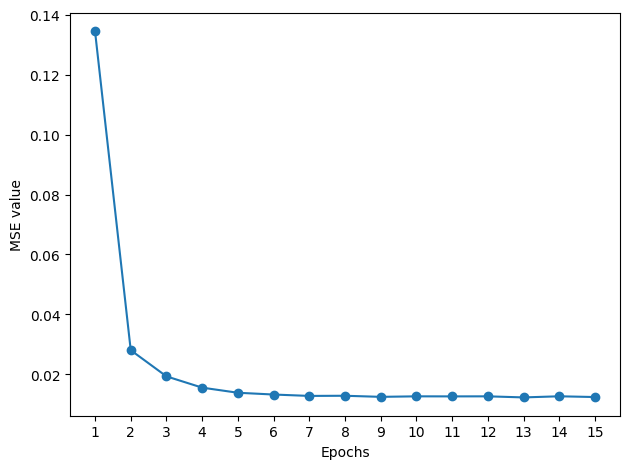

In [8]:
ada_sgd = AdalineSGD(eta=0.01, n_iter=15, random_state=1, shuffle=True)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, ada_sgd)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("Длина чашелистника [стандартизирована]")
plt.ylabel("Длина лепестка [стандартизирована]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, ada_sgd.n_iter + 1), ada_sgd.losses_, marker="o")
plt.xticks(range(1, ada_sgd.n_iter + 1))
plt.xlabel("Epochs")
plt.ylabel("MSE value")
plt.tight_layout()

plt.show()

In [9]:
# Online learning (partial fit)
ada_sgd.partial_fit(X_std[0, :], y[0])
print("Success, use all features")

Success, use all features
